## Final Project Submission

Please fill out:
* Student name: Morvine Awuor Otieno 
* Student pace: Full Time Remote
* Scheduled project review date/time: 4th October 2025
* Instructor name: Nikita Njoroge 
* Blog post URL:


### Overview
This project focuses on analyzing aviation accident data from 1962 to 2023 to identify aircraft types with the lowest risk profiles. The company is expanding into the aviation industry and needs to make informed decisions about purchasing aircraft for commercial and private operations. The primary stakeholder is the head of the new aviation division, who requires clear insights into aircraft safety to minimize operational risks and guide investment decisions. The project is situated within the aviation sector, specifically targeting risk assessment for aircraft acquisition.


### Business Understanding

The company wants to enter the aviation market but is uncertain about the safety risks associated with different aircraft types. Without data-driven insights, they risk investing in high-risk models that could lead to operational losses or reputational damage.


In [67]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)


In [68]:
type(df)

pandas.core.frame.DataFrame

In [69]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [70]:
# Preview data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [71]:
# row and columns
df.shape

(90348, 31)

In [72]:
# Statistics summary for numeric columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [73]:
# columns
df.columns.tolist()


['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

### 3. Data Preparation ExplanationWe begin by renaming columns to improve readability and converting the accident dates into a proper datetime format. To ensure data quality for analysis, we remove rows that are missing critical information such as aircraft type, manufacturer, or accident date. After cleaning the data, we extract the accident year to analyze trends over time..

In [74]:
# Rename columns for clarity
df.rename(columns={
   'Model': 'Aircraft_Type',
    'Make': 'Manufacturer',
    'Event.Date': 'Accident_Date',
    'Injury.Severity': 'Accident_Severity'
}, inplace=True)

In [75]:
# Convert Accident_Date to datetime
df['Accident_Date'] = pd.to_datetime(df['Accident_Date'], errors='coerce')

In [76]:
# Summary (min, max, mean, etc.)
df['Accident_Date'].describe()

count                            88889
mean     1999-09-17 17:13:39.354476032
min                1948-10-24 00:00:00
25%                1989-01-15 00:00:00
50%                1998-07-18 00:00:00
75%                2009-07-01 00:00:00
max                2022-12-29 00:00:00
Name: Accident_Date, dtype: object

In [77]:
# See rows with invalid dates
missing_dates = df[df['Accident_Date'].isna()]
print(missing_dates)

      Event.Id Investigation.Type Accident.Number Accident_Date Location  \
64030      NaN         25-09-2020             NaN           NaT      NaN   
64050      NaN         25-09-2020             NaN           NaT      NaN   
64052      NaN         25-09-2020             NaN           NaT      NaN   
64388      NaN         25-09-2020             NaN           NaT      NaN   
64541      NaN         25-09-2020             NaN           NaT      NaN   
...        ...                ...             ...           ...      ...   
90004      NaN         15-12-2022             NaN           NaT      NaN   
90010      NaN         15-12-2022             NaN           NaT      NaN   
90031      NaN         15-12-2022             NaN           NaT      NaN   
90090      NaN         20-12-2022             NaN           NaT      NaN   
90097      NaN         20-12-2022             NaN           NaT      NaN   

      Country Latitude Longitude Airport.Code Airport.Name  ...  \
64030     NaN      N

#### 3.1 Drop rows with missing critical info

In [78]:
# Drop rows with missing critical info
df_clean = df.dropna(subset=['Aircraft_Type', 'Manufacturer', 'Accident_Date']).copy()

#### 3.2 Confirming if the cleaning worked

In [79]:
print(df_clean[['Aircraft_Type', 'Manufacturer', 'Accident_Date']].isna().sum())

Aircraft_Type    0
Manufacturer     0
Accident_Date    0
dtype: int64


#### 3.3 Check number of rows before/after cleaning

In [80]:
f"Before cleaning: {len(df)} rows"

'Before cleaning: 90348 rows'

In [81]:
f"After cleaning: {len(df_clean)} rows"

'After cleaning: 88777 rows'

In [82]:
# See first 5 values
df_clean['Accident_Date'].head()

0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
4   1979-08-02
Name: Accident_Date, dtype: datetime64[ns]

#### 3.4 Extracting year for trend analysis

In [83]:
df_clean['Year'] = df_clean['Accident_Date'].dt.year

In [84]:
df_clean.head()[["Accident_Date", "Year"]]

,Accident_Date,Year
0,1948-10-24,1948
1,1962-07-19,1962
2,1974-08-30,1974
3,1977-06-19,1977
4,1979-08-02,1979


In [85]:
# Accident counts by aircraft type

accidents_by_type = df_clean['Aircraft_Type'].value_counts()
accidents_by_type

Aircraft_Type
152                    2367
172                    1756
172N                   1164
PA-28-140               932
150                     829
                       ... 
SNJ-5C                    1
QUICKSILVER SPORT 2       1
727-2Q8                   1
WMF                       1
M-8 EAGLE                 1
Name: count, Length: 12311, dtype: int64

In [86]:
# Accident counts by manufacturer
accidents_by_manufacturer = df_clean['Manufacturer'].value_counts()
accidents_by_manufacturer

Manufacturer
Cessna           22226
Piper            12029
CESSNA            4919
Beech             4330
PIPER             2840
                 ...  
Conrad Menzel        1
Blucher              1
Gideon               1
Brault               1
ROYSE RALPH L        1
Name: count, Length: 8224, dtype: int64

In [87]:
# Accident trend over years
accidents_per_year = df_clean.groupby('Year').size()
accidents_per_year

Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3573
1983    3556
1984    3456
1985    3096
1986    2879
1987    2828
1988    2730
1989    2543
1990    2517
1991    2462
1992    2352
1993    2313
1994    2256
1995    2308
1996    2187
1997    2148
1998    2224
1999    2208
2000    2218
2001    2060
2002    2020
2003    2080
2004    1951
2005    2029
2006    1848
2007    2010
2008    1887
2009    1770
2010    1778
2011    1842
2012    1819
2013    1557
2014    1534
2015    1581
2016    1663
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64

In [88]:
# Accident severity distribution
severity_counts = df_clean['Accident_Severity'].value_counts()
severity_counts

Accident_Severity
Non-Fatal     67305
Fatal(1)       6159
Fatal          5248
Fatal(2)       3703
Incident       2214
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

### 5. Visualization

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


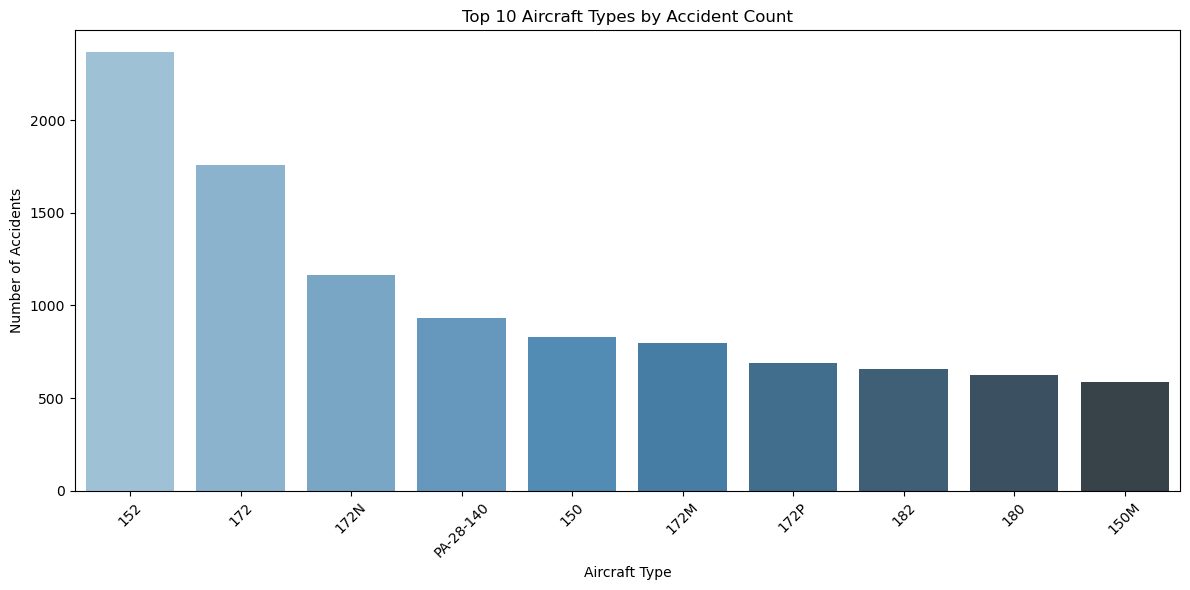

In [90]:
# Bar chart: Top 10 Aircraft Types by Accident Count

plt.figure(figsize=(12,6))
sns.barplot(x=accidents_by_type.index[:10], y=accidents_by_type.values[:10], palette='Blues_d')
plt.title('Top 10 Aircraft Types by Accident Count')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Summary of Top 10 Aircraft Types by Accident Count chart
The data indicates that certain aircraft types, particularly models like the "152" and "172," have been involved in more accidents than others. This suggests that safety efforts and further investigation could be prioritized for these aircraft to help reduce accident rates and improve overall aviation safety.



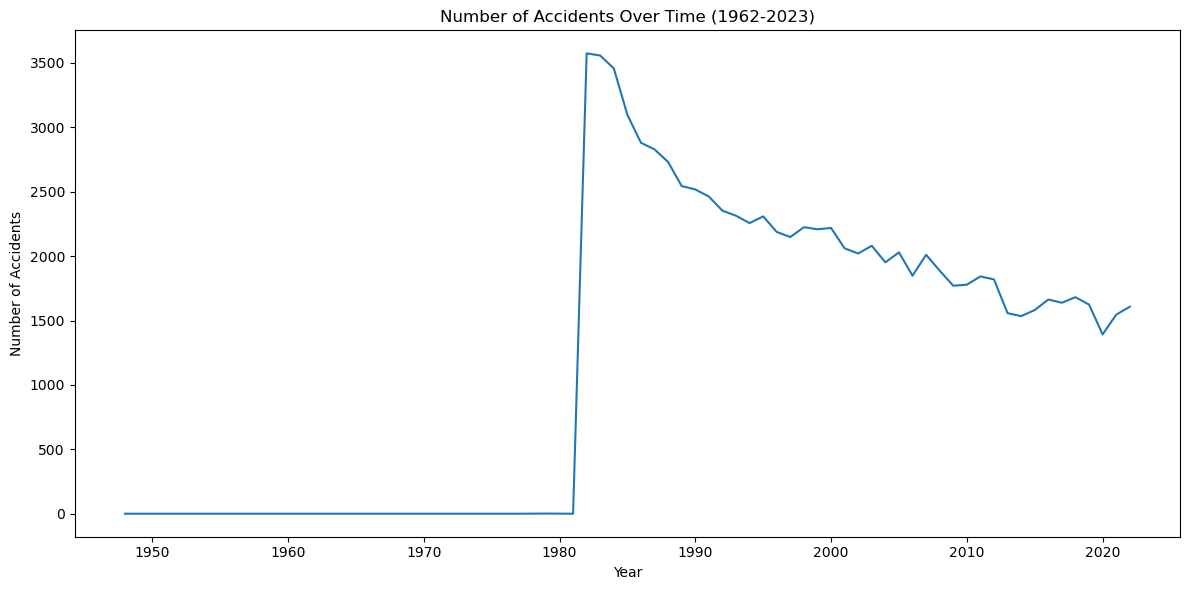

In [91]:
# Line chart: Accidents Over Time

plt.figure(figsize=(12,6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title('Number of Accidents Over Time (1962-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

### Summary of Number of Accidents Over Time (1962-2023) Chart
The trend in the number of aircraft accidents from 1962 to 2023 shows a significant increase around the early 1980s, followed by a steady decline over subsequent decades. This decline suggests improvements in aviation safety, technology, regulations, and pilot training over time. Although there are minor fluctuations, the overall reduction in accident counts indicates progress toward safer air travel.

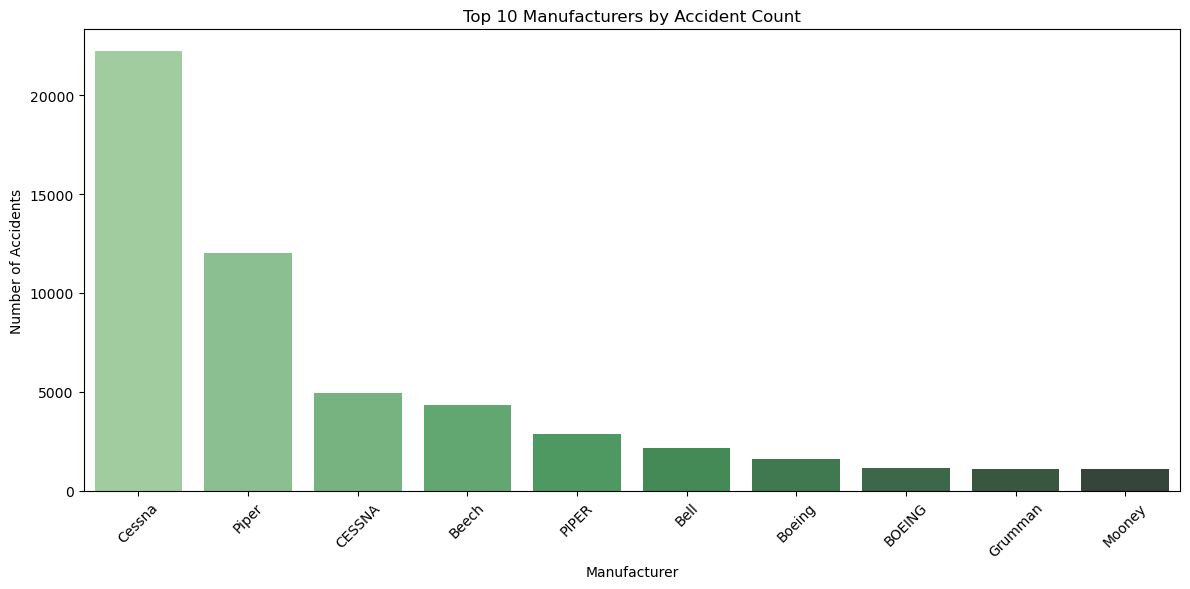

In [92]:
# Bar chart: Accident Counts by Manufacturer (Top 10)
plt.figure(figsize=(12,6))
sns.barplot(x=accidents_by_manufacturer.index[:10], y=accidents_by_manufacturer.values[:10], palette='Greens_d')
plt.title('Top 10 Manufacturers by Accident Count')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Summary of Top Manufacturers by Accident Count Chart
The chart shows that Cessna and Piper are the manufacturers with the highest number of accidents, significantly surpassing other manufacturers. This likely reflects their widespread use in general aviation, where smaller aircraft are more common. While Boeing appears in the top 10, its accident count is much lower compared to Cessna and Piper. This data can guide targeted safety improvements and risk assessments by manufacturer.

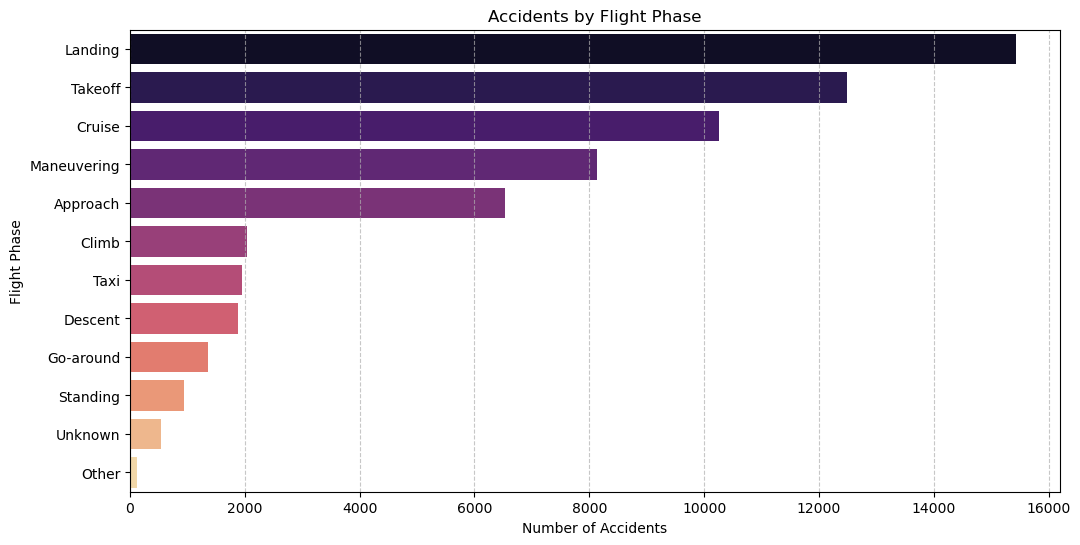

In [93]:
plt.figure(figsize=(12, 6))

# Count of accidents per flight phase
flight_phase_accidents = df_clean['Broad.phase.of.flight'].value_counts().reset_index()
flight_phase_accidents.columns = ['Flight Phase', 'Accident Count']

# Plot
sns.barplot(x='Accident Count', y='Flight Phase', data=flight_phase_accidents, palette='magma')

# Labels & Title
plt.xlabel('Number of Accidents')
plt.ylabel('Flight Phase')
plt.title('Accidents by Flight Phase')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

### Summary of Accidents by Fight phase chart
The bar chart reveals the distribution of accidents across different phases of flight. Certain flight phases exhibit notably higher accident counts, indicating these stages may pose greater risks. This insight highlights the need for focused safety measures and training during these critical phases to reduce accident rates and improve overall flight safety.

### Conclusion
This project provides a comprehensive analysis of aircraft accident data to assess aviation safety risks. Key findings reveal that certain aircraft types and manufacturers, such as Cessna and Piper, account for a higher number of accidents likely due to their extensive use in general aviation. Over time, accident trends show a significant decline, indicating improvements in safety practices, technology, and regulation. 

Additionally, accident distribution across flight phases highlights critical stages where incidents are more likely to occur, emphasizing the need for targeted safety measures. These insights collectively support informed, data-driven decisions as the company prepares to enter the aviation market.

### Next Steps

Future work could include:
- Developing predictive models to forecast aircraft risk based on additional factors.
- Incorporating maintenance and operational data to refine risk assessments.
- Expanding the dashboard to include real-time data updates and alerts.

